<a href="https://colab.research.google.com/github/jonesLevin/Data-Science-Competitions/blob/main/DataDrive2030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataDrive2030 Early Learning Predictors Challenge
Can you identify which features of an early learning programme predict better learning outcomes for children?

## Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# For working with files
from glob import glob

# Scikit-learn based dependencies
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Gradient boosting models
import catboost
import xgboost as xgb
import lightgbm as lgbm

pd.set_option('display.max_columns', 500)

## Getting The Data

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample_sub = pd.read_csv('SampleSubmission.csv')
variable_def = pd.read_csv('VariableDescription.csv')

<ipython-input-3-d94a82b48bfa>:1: DtypeWarning: Columns (140,172,254,257,275,306,343,358,373,374,461,635,641,642,643) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Train.csv')
<ipython-input-3-d94a82b48bfa>:2: DtypeWarning: Columns (172,252,254,257,275,343,358,359,461,641,642,643) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('Test.csv')


In [ ]:
sample_sub = pd.read_csv('SampleSubmission.csv')

## Building A Baseline Model

In [ ]:
features = []; cat_features = []; not_features = []

for col in train.columns[1:]:
    if train[col].isnull().sum() <= 6000:
        features.append(col)
        if train[col].dtype == 'O':
            cat_features.append(col)
            # print(f'There are {len(train_data[col].value_counts())} class in {col} column') 
    else:
        not_features.append(col)

In [ ]:
train = train[features]
test = test[features[:-1]]

In [ ]:
train = train.fillna('')
test = test.fillna('')

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train[train.columns[:-1]],
                                                    train[train.columns[-1]],
                                                    test_size=0.15,
                                                    random_state=42)

In [ ]:
# Building the model
X_test = test[features[:-1]]
train_dataset = catboost.Pool(data=X_train, label=y_train, cat_features=cat_features)
val_dataset = catboost.Pool(data=X_valid, label=y_valid, cat_features=cat_features)
model = catboost.CatBoostRegressor(iterations=5000, 
                                   learning_rate=0.01, 
                                   random_state=42, 
                                   verbose=300)
model.fit(train_dataset, 
          eval_set=val_dataset, 
          use_best_model=True,
          early_stopping_rounds=300)
preds_valid = model.predict(X_valid)
preds_test = model.predict(X_test)
print(f'RMSE in validation data: {np.sqrt(mean_squared_error(y_valid, preds_valid))}')

0:	learn: 15.0335364	test: 15.5243795	best: 15.5243795 (0)	total: 348ms	remaining: 28m 58s
300:	learn: 11.1807985	test: 11.5581273	best: 11.5581273 (300)	total: 1m 45s	remaining: 27m 21s
600:	learn: 10.6270211	test: 11.1015713	best: 11.1015713 (600)	total: 3m 27s	remaining: 25m 15s
900:	learn: 10.2637392	test: 10.8479739	best: 10.8479739 (900)	total: 5m 9s	remaining: 23m 26s
1200:	learn: 9.8882885	test: 10.6001685	best: 10.6001685 (1200)	total: 6m 48s	remaining: 21m 33s
1500:	learn: 9.6466273	test: 10.4646289	best: 10.4646289 (1500)	total: 8m 33s	remaining: 19m 55s
1800:	learn: 9.4683362	test: 10.3720684	best: 10.3720684 (1800)	total: 10m 16s	remaining: 18m 14s
2100:	learn: 9.3185313	test: 10.3065453	best: 10.3065453 (2100)	total: 12m	remaining: 16m 34s
2400:	learn: 9.1805414	test: 10.2608385	best: 10.2608385 (2400)	total: 13m 42s	remaining: 14m 50s
2700:	learn: 9.0635278	test: 10.2298331	best: 10.2298331 (2700)	total: 15m 23s	remaining: 13m 6s
3000:	learn: 8.9521098	test: 10.1987190	b

In [ ]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [ ]:
features = X_test.columns
f = dict()
f['feature_1'] = []; f['feature_2'] = []; f['feature_3'] = []; f['feature_4'] = []; f['feature_5'] = []; f['feature_6'] = []
f['feature_7'] = []; f['feature_8'] = []; f['feature_9'] = []; f['feature_10'] = []; f['feature_11'] = []; f['feature_12'] = []
f['feature_13'] = []; f['feature_14'] = []; f['feature_15'] = []

In [ ]:
d = {
    'f1': [], 'f2': [], 'f3': [], 'f4': [], 'f5': [], 'f6': [], 'f7': [], 'f8': [],
     'f9': [], 'f10': [], 'f11': [], 'f12': [], 'f13': [], 'f14': [], 'f15': []
}

In [ ]:
for val in shap_values:
    arr = np.argsort(shap_values)[::-1][:15]
    for idx, a in enumerate(arr):
        name_feat = f'feature_{idx + 1}'
        f[name_feat].append(features[a])

In [ ]:
for val in shap_values:
    arr = np.argsort(val)[::-1][:15]
    for idx, a in enumerate(arr):
        name_feat = f'f{idx + 1}'
        d[name_feat].append(features[a])

In [ ]:
len(d['f1']) / 2

3680.0

In [ ]:
sample_sub['target'] = preds_test
sample_sub['feature_1'] = d['f1']
sample_sub['feature_2'] = d['f2']
sample_sub['feature_3'] = d['f3']
sample_sub['feature_4'] = d['f4']
sample_sub['feature_5'] = d['f5']
sample_sub['feature_6'] = d['f6']
sample_sub['feature_7'] = d['f7']
sample_sub['feature_8'] = d['f8']
sample_sub['feature_9'] = d['f9']
sample_sub['feature_10'] = d['f10']
sample_sub['feature_11'] = d['f11']
sample_sub['feature_12'] = d['f12']
sample_sub['feature_13'] = d['f13']
sample_sub['feature_14'] = d['f14']
sample_sub['feature_15'] = d['f15']

In [ ]:
sample_sub

,child_id,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,ID_0I0999N6S,55.574123,child_observe_diligent,teacher_emotional_total,child_observe_attentive,child_observe_interested,child_observe_total,teacher_emotional_selfstarter,child_years_in_programme,teacher_emotional_independent,child_gender,teacher_emotional_understand,teacher_emotional_met,teacher_social_peers,pri_fees_amount,id_team,ses_cat
1,ID_GQ6ONJ4FP,44.996617,teacher_emotional_total,child_observe_attentive,child_observe_diligent,child_observe_total,child_observe_interested,child_observe_concentrated,teacher_emotional_selfstarter,teacher_emotional_met,teacher_emotional_understand,teacher_social_peers,child_gender,count_register_year_2020,teacher_emotional_independent,count_children_present,pri_fees_amount
2,ID_YZ76CVRW3,49.686945,id_enumerator,child_observe_diligent,mn_best,prov_best,child_date,id_team,child_observe_attentive,id_prov,child_observe_interested,id_mn_best,teacher_emotional_understand,obs_handwashing_1,count_register_year_2020,child_observe_total,pri_fees_amount
3,ID_BNINCRXH8,67.579214,child_observe_diligent,id_enumerator,child_observe_attentive,child_observe_concentrated,child_age,child_observe_total,prov_best,mn_best,teacher_emotional_total,child_stunted,child_observe_interested,teacher_emotional_understand,child_years_in_programme,teacher_emotional_selfstarter,child_date
4,ID_1U7GDTLRI,45.724509,child_observe_diligent,child_observe_interested,child_observe_attentive,pri_attendance,prov_best,child_observe_total,pri_registered_programme,teacher_emotional_understand,id_prov,longitude,id_ward,id_team,teacher_social_assistance,count_register_year_2020,id_facility
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,ID_LBPQ2VMQZ,55.452823,child_age,child_age_group,child_observe_interested,child_observe_attentive,ses_proxy,child_stunted,mn_best,teacher_emotional_understand,teacher_emotional_selfstarter,prov_best,child_years_in_programme,teacher_emotional_independent,teacher_social_peers,child_date,id_mn_best
3676,ID_H2RKKMMKK,51.264259,child_age_group,child_age,child_height,id_enumerator,ward_best,obs_handwashing_1,mn_best,child_zha,child_gender,prov_best,id_team,id_ward,id_mn_best,pri_fees_amount,count_register_year_2020
3677,ID_VY8KX7YTZ,43.490205,child_observe_diligent,child_observe_attentive,child_age,child_observe_total,child_observe_interested,child_observe_concentrated,obs_materials,child_gender,teacher_emotional_selfstarter,child_date,count_register_year_2020,pri_attendance,pri_meal_2,certificate_registration_program,pri_holidays
3678,ID_EO2MYZ4M7,36.703462,mn_best,id_facility,child_zha,obs_handwashing_1,child_gender,id_mn_best,count_register_year_2020,pri_language_7,obs_materials,pri_meal_2,count_children_present,id_enumerator,child_dob,pri_separate,certificate_registration_program


In [ ]:
sample_sub.to_csv('solution.csv', index=False)

## Upgrading The Model
From the baseline model above, we can get the first 20-30 features are are common and do more engineering on them

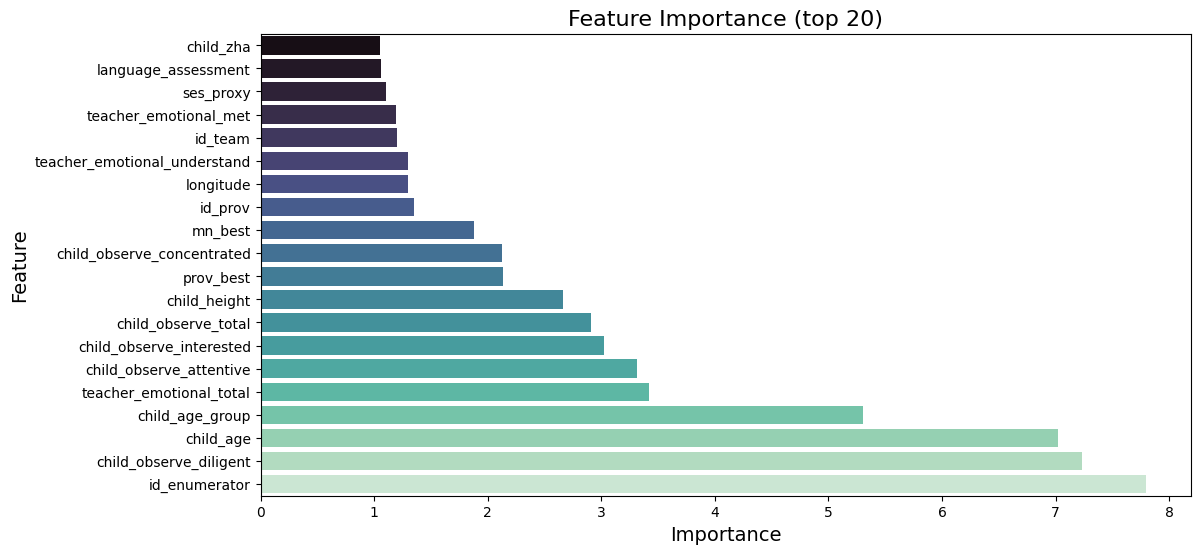

In [ ]:
# Getting more relevant features
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]
top_features = np.array(X_test.columns)[sorted_idx]

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=feature_importance[sorted_idx], y=top_features, palette='mako', orient='h')
ax.set_title('Feature Importance (top 20)', fontsize=16)
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)
plt.show()
